In [67]:
import numpy
import pandas as pd
from numpy import arange
import matplotlib
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

In [68]:
filename = 'wisc_bc_data.csv'
dataset = read_csv(filename)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [70]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [71]:
dataset.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [72]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [73]:
dataset2 = dataset.drop(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','fractal_dimension_mean','concave points_mean','concavity_mean','fractal_dimension_se','symmetry_mean','symmetry_se','concave points_se','concavity_se'], axis=1)

In [74]:
dataset2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,1.0950,0.9053,8.589,153.40,0.006399,0.04904,25.38,17.33,184.60,2019.0,0.1622,0.6656
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.5435,0.7339,3.398,74.08,0.005225,0.01308,24.99,23.41,158.80,1956.0,0.1238,0.1866
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.7456,0.7869,4.585,94.03,0.006150,0.04006,23.57,25.53,152.50,1709.0,0.1444,0.4245
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.4956,1.1560,3.445,27.23,0.009110,0.07458,14.91,26.50,98.87,567.7,0.2098,0.8663
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.7572,0.7813,5.438,94.44,0.011490,0.02461,22.54,16.67,152.20,1575.0,0.1374,0.2050


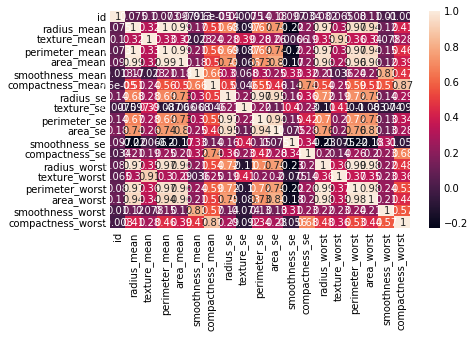

In [75]:
corelation = dataset2.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

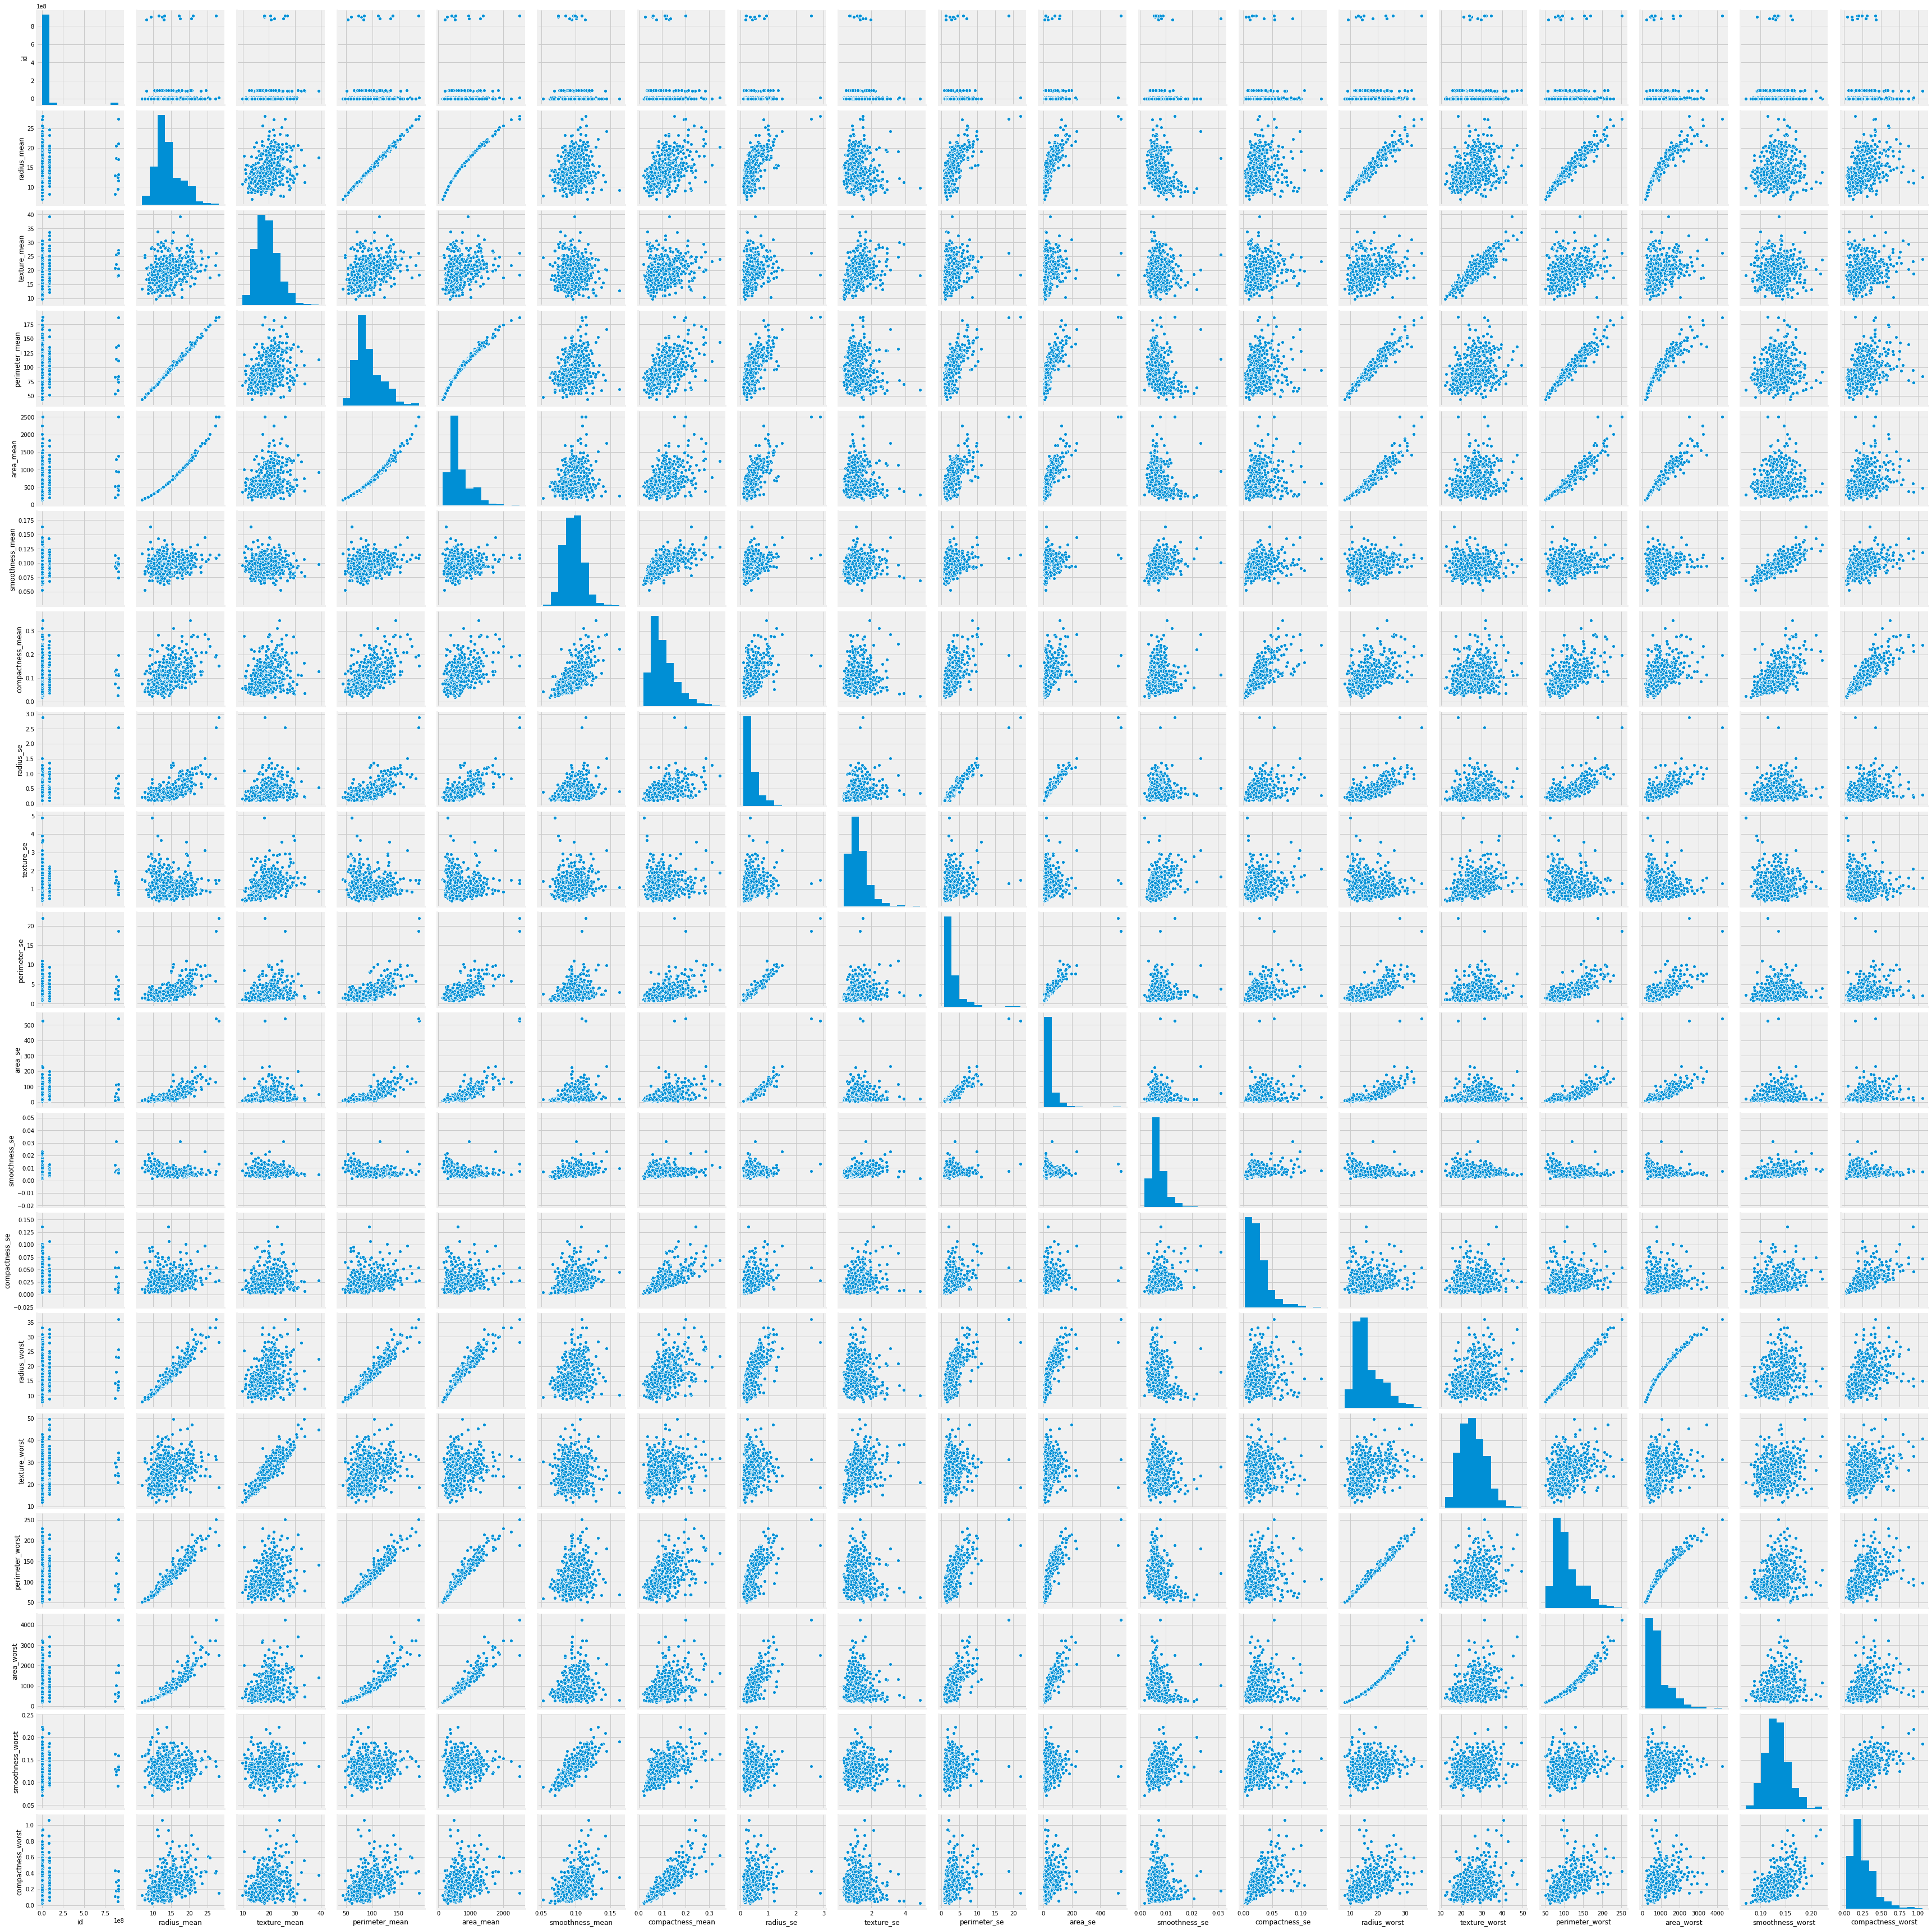

In [76]:
sns.pairplot(dataset2)

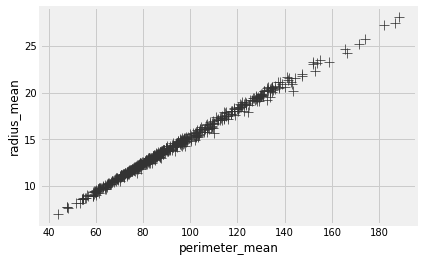

In [82]:
sns.scatterplot(data=dataset2, x="perimeter_mean", y="radius_mean", s=100, color=".2", marker="+")

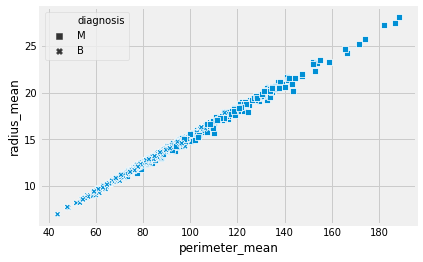

In [83]:
markers = {"M": "s", "B": "X"}
sns.scatterplot(data=dataset2, x="perimeter_mean", y="radius_mean", style="diagnosis", markers=markers)

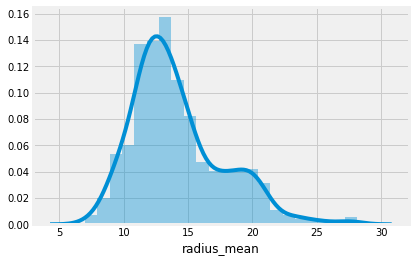

In [84]:
sns.distplot(dataset2['radius_mean'])

In [85]:
print(dataset2.dtypes)

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
dtype: object


In [86]:
one_hot_encoded_data = pd.get_dummies(dataset2, columns = ['diagnosis'])
one_hot_encoded_data.tail()
                                      

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,radius_se,texture_se,perimeter_se,...,smoothness_se,compactness_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,diagnosis_B,diagnosis_M
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,1.1760,1.256,7.673,...,0.010300,0.02891,25.450,26.40,166.10,2027.0,0.14100,0.21130,0,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.7655,2.463,5.203,...,0.005769,0.02423,23.690,38.25,155.00,1731.0,0.11660,0.19220,0,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.4564,1.075,3.425,...,0.005903,0.03731,18.980,34.12,126.70,1124.0,0.11390,0.30940,0,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.7260,1.595,5.772,...,0.006522,0.06158,25.740,39.42,184.60,1821.0,0.16500,0.86810,0,1
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.3857,1.428,2.548,...,0.007189,0.00466,9.456,30.37,59.16,268.6,0.08996,0.06444,1,0


In [87]:
array = one_hot_encoded_data.values
X = array[:,0:-1]
Y = array[:,-1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [88]:
X_train.shape,Y_train.shape

((455, 20), (455,))

In [89]:
X_validation.shape, Y_validation.shape

((114, 20), (114,))

In [90]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_pred = regressor.predict(X_validation)
y_pred

array([-2.88880031e-13,  1.00000000e+00, -2.89657187e-13, -2.84994250e-13,
       -2.05613304e-13,  1.00000000e+00, -2.14384066e-13, -2.12274642e-13,
        1.00000000e+00, -2.91100477e-13,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -2.87880830e-13, -2.91322522e-13, -2.15050200e-13,
       -2.14162021e-13, -2.89768209e-13,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -2.90545366e-13,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  5.64659430e-13,
       -2.87658786e-13,  1.00000000e+00, -2.88435942e-13, -2.89213098e-13,
       -2.85771407e-13,  1.00000000e+00, -2.91100477e-13,  1.00000000e+00,
       -2.95652391e-13, -2.88769009e-13, -2.90767410e-13, -2.91766611e-13,
        5.61994895e-13, -2.86992652e-13, -2.97428748e-13, -2.15050200e-13,
        1.00000000e+00, -2.93765012e-13, -2.88213897e-13, -2.90434343e-13,
       -2.09832152e-13,  1.00000000e+00, -2.11830553e-13,  1.00000000e+00,
        1.00000000e+00, -

In [92]:
regressor.coef_

array([ 9.78179961e-21,  7.14073145e-16,  9.49685998e-18, -9.86238614e-17,
       -8.88222532e-18,  2.01428001e-15,  4.55120608e-15,  9.93680617e-16,
       -8.73115529e-18, -6.17958180e-17,  1.79246264e-16, -2.12105647e-14,
       -3.07368076e-15,  2.85251406e-16, -3.68406996e-17, -5.62009994e-17,
       -6.72781783e-18,  1.53284264e-15,  8.88240102e-16, -1.00000000e+00])

In [93]:
regressor.intercept_

0.9999999999997055

In [94]:
r2_score(Y_validation,y_pred)

1.0